<a href="https://colab.research.google.com/github/Jaruwan-Project/Blood-Bank-simulation-Project/blob/master/Bloodbank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import file in pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("demand1.txt")
print(df)
print(df['Day'].dtypes)
print(df['Day'][0])
print(df['Day'][0]%7)

   1  1.1  42  12
0  2    1  32  10
1  3    1  27  11
2  4    0  16  36
3  5    1  24   9
4  6    0  13  32
5  7    1  16   8


KeyError: ignored

In [ ]:
def rand_demand_pd(day):
  if df['distype'][day] == 1:
    print("normal Dis")
rand_demand_pd(0)

normal Dis


import file by numpy

In [ ]:
import numpy as np

In [ ]:
RawDemand = np.genfromtxt("demand1.txt", dtype=int,encoding=None, delimiter=",")
RawDonate = np.genfromtxt("donate1.txt", dtype=int,encoding=None, delimiter=",")
Rawimport = np.genfromtxt("import1.txt", dtype=int,encoding=None, delimiter=",")
print(RawDemand)
print(RawDonate)
print(Rawimport)
print(RawDemand[0][0])

[[ 1  1 42 12]
 [ 2  1 32 10]
 [ 3  1 27 11]
 [ 4  0 16 36]
 [ 5  1 24  9]
 [ 6  0 13 32]
 [ 7  1 16  8]]
[[1 1 7 2]
 [2 1 8 3]
 [3 1 7 4]
 [4 1 7 3]
 [5 1 7 3]
 [6 1 7 3]
 [7 0 0 0]]
[[ 1  1  8  6]
 [ 2  1 17 23]
 [ 3  1 11  8]
 [ 4  1  7  5]
 [ 5  1 14 20]
 [ 6  1  4  6]
 [ 7  1 12 15]]
1


create function random demand donate import

In [ ]:
def rand_demand_np(day):
  if RawDemand[day][1] == 1:
    print("normal Dis")
    use = np.random.normal(RawDemand[day][2], RawDemand[day][3])
    while use < 0 : use = np.random.normal(RawDemand[day][2], RawDemand[day][3])
    useint = np.round(use)
    useint = np.int_(useint)
  elif RawDemand[day][1] == 0:
    print("Uniform Dis")
    use = np.random.uniform(RawDemand[day][2], RawDemand[day][3])
    while use < 0 : use = np.random.normal(RawDemand[day][2], RawDemand[day][3])
    useint = np.round(use)
    useint = np.int_(useint)
  return useint
demand = rand_demand_np(2)
print(demand.dtype)
print(demand)

normal Dis
int64
26


In [ ]:
def rand_donate_np(day):
  if RawDonate[day][1] == 1:
    print("normal Dis")
    don = np.random.normal(RawDonate[day][2], RawDonate[day][3])
    while don < 0 : don = np.random.normal(RawDonate[day][2], RawDonate[day][3])
    donint = np.round(don)
    donint = np.int_(donint)
  elif RawDonate[day][1] == 0:
    print("Uniform Dis")
    don = np.random.uniform(RawDonate[day][2], RawDonate[day][3])
    while don < 0 : don = np.random.normal(RawDonate[day][2], RawDonate[day][3])
    donint = np.round(don)
    donint = np.int_(donint)
  return donint

In [ ]:
def rand_import_np(day):
  if Rawimport[day][1] == 1:
    print("normal Dis")
    im = np.random.normal(Rawimport[day][2], Rawimport[day][3])
    while im < 0: im = np.random.normal(Rawimport[day][2], Rawimport[day][3])
    imint = np.round(im)
    imint = np.int_(imint)
  elif Rawimport[day][1] == 0:
    print("Uniform Dis")
    im = np.random.uniform(Rawimport[day][2], Rawimport[day][3])
    while im < 0: im = np.random.normal(Rawimport[day][2], Rawimport[day][3])
    imint = np.round(im)
    imint = np.int_(imint)
  return imint
rand_import_np(0)


normal Dis


13

Process inside blood bank (import file & print stock)

In [ ]:
Bank_newblood=[]
Bank_Oldblood=[]
needmore=0
waste=0
for x in range(5):
  day=x%7
  i=0
  a=0
  m=0
  print(day)
  print("////////")
  donate = rand_donate_np(day)+rand_import_np(day)
  donate =np.int_(donate)
  use=rand_demand_np(day)
  print("donate",donate)
  print("demand",use)
  print("////////")
  for x in range(donate):
    Bank_newblood.append(0)
  for i in Bank_newblood:
    print(i)
  for i in Bank_Oldblood:
    print(i)
  n=Bank_newblood.count(7)
  if n > 0:
    while 7 in Bank_newblood: Bank_newblood.remove(7)
    for x in range(n):
      Bank_Oldblood.append(7)
  n=Bank_Oldblood.count(7)
  if n > 0:
    while 35 in Bank_Oldblood: 
      Bank_Oldblood.remove(35)
      m +=1
  waste=waste+m
  print("///////////")
  if use <= len(Bank_newblood)+len(Bank_Oldblood) :
    for x in range(use):
      if  len(Bank_Oldblood)>0:
        Bank_Oldblood.pop()
      else:
        Bank_newblood.pop()
  else:
    Bank_newblood.clear()
    Bank_Oldblood.clear()
    needmore = needmore+(use-donate)
  for i in Bank_newblood:
    print(i)
  for i in Bank_Oldblood:
    print(i)
  print("///////////")
  while i < len(Bank_newblood):
    Bank_newblood[i]=Bank_newblood[i]+1
    i += 1
  while i < len(Bank_Oldblood):
    Bank_Oldblood[i]=Bank_Oldblood[i]+1
    i += 1
  for i in Bank_newblood:
    print(i)
  for i in Bank_Oldblood:
    print(i)
  print("NewBlood",len(Bank_newblood))
  print("OldwBlood",len(Bank_Oldblood))
  print("needmore",needmore)
  print("waste",waste)

0
////////
normal Dis
normal Dis
normal Dis
donate 19
demand 55
////////
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
///////////
///////////
NewBlood 0
OldwBlood 0
needmore 36
waste 0
1
////////
normal Dis
normal Dis
normal Dis
donate 28
demand 42
////////
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
///////////
///////////
NewBlood 0
OldwBlood 0
needmore 50
waste 0
2
////////
normal Dis
normal Dis
normal Dis
donate 45
demand 29
////////
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
///////////
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
///////////
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
NewBlood 16
OldwBlood 0
needmore 50
waste 0
3
////////
normal Dis
normal Dis
Uniform Dis
donate 12
demand 21
////////
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
///////////
1
1
1
1
1
1
1
///////////
1
2
2
2
2
2
2
NewBlood 7
OldwBlood 0
needmore 50
waste 0
4
////////
normal Dis
normal Dis
normal Dis
donate 64
demand 21
////////
1
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0

Process inside blood bank (import file & not print stock) แก้บั๊ก needmore

In [ ]:
Bank_newblood=[]
Bank_Oldblood=[]
needmore=0
waste=0
realday=0
for x in range(8):
  realday+=1
  day=x%7
  i=0
  a=0
  m=0
  print(day)
  print("////////")
  donate = rand_donate_np(day)+rand_import_np(day)
  donate =np.int_(donate)
  use=rand_demand_np(day)
  demand=use
  print("donate",donate)
  print("demand",use)
  print("////////")
  for x in range(donate):
    Bank_newblood.append(0)
  n=Bank_newblood.count(7)
  if n > 0:
    while 7 in Bank_newblood: Bank_newblood.remove(7)
    for x in range(n):
      Bank_Oldblood.append(7)
  n=Bank_Oldblood.count(7)
  if n > 0:
    while 35 in Bank_Oldblood: 
      Bank_Oldblood.remove(35)
      m +=1
  waste=waste+m
  if use<=len(Bank_newblood)+len(Bank_Oldblood) :
    for x in range(use):
      if  len(Bank_Oldblood)>0:
        Bank_Oldblood.pop()
      else:
        Bank_newblood.pop()
  elif use > len(Bank_newblood)+len(Bank_Oldblood) and len(Bank_newblood)+len(Bank_Oldblood) > 0 :
    while len(Bank_newblood) > 0: 
      Bank_newblood.pop()
      use =use-1
    while len(Bank_Oldblood) > 0: 
      Bank_Bank_Oldblood.pop()
      use =use-1
    needmore = needmore+use
  else:
      Bank_newblood.clear()
      Bank_Oldblood.clear()
      needmore = needmore+(use-len(Bank_newblood)-len(Bank_Oldblood))
  while i < len(Bank_newblood):
    Bank_newblood[i]=Bank_newblood[i]+1
    i += 1
  while i < len(Bank_Oldblood):
    Bank_Oldblood[i]=Bank_Oldblood[i]+1
    i += 1
  print("NewBlood",len(Bank_newblood))
  print("OldwBlood",len(Bank_Oldblood))
  print("needmore",needmore)
  print("waste",waste)
  p1.append(Bloodplot(realday,donate,demand,len(Bank_newblood),len(Bank_Oldblood),needmore,waste))

0
////////
normal Dis
normal Dis
normal Dis
donate 11
demand 35
////////
NewBlood 0
OldwBlood 0
needmore 24
waste 0
1
////////
normal Dis
normal Dis
normal Dis
donate 30
demand 37
////////
NewBlood 0
OldwBlood 0
needmore 31
waste 0
2
////////
normal Dis
normal Dis
normal Dis
donate 26
demand 38
////////
NewBlood 0
OldwBlood 0
needmore 43
waste 0
3
////////
normal Dis
normal Dis
Uniform Dis
donate 9
demand 25
////////
NewBlood 0
OldwBlood 0
needmore 59
waste 0
4
////////
normal Dis
normal Dis
normal Dis
donate 45
demand 17
////////
NewBlood 28
OldwBlood 0
needmore 59
waste 0
5
////////
normal Dis
normal Dis
Uniform Dis
donate 21
demand 23
////////
NewBlood 26
OldwBlood 0
needmore 59
waste 0
6
////////
Uniform Dis
normal Dis
normal Dis
donate 15
demand 23
////////
NewBlood 18
OldwBlood 0
needmore 59
waste 0
0
////////
normal Dis
normal Dis
normal Dis
donate 17
demand 63
////////
NewBlood 0
OldwBlood 0
needmore 87
waste 0


สร้าง class เก็บข้อมูล เป็นแพค ก่อนไปพล็อต

In [ ]:
p1=[]
class Bloodplot:
  def __init__(self,day,donate,demand,innewbank,inoldbank,needmore,waste):
    self.day = day
    self.donate = donate
    self.demand = demand
    self.innewbank = innewbank
    self.inoldbank = inoldbank
    self.needmore = needmore
    self.waste = waste
    


ลองเรียกคลาส (ใช้ได้)

In [ ]:
print(p1[0].demand)
print(p1[0].day)

35
1


พล็อตกราฟ matpoltlip



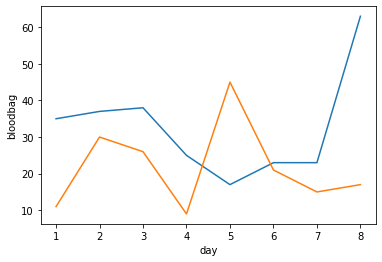

In [ ]:
from matplotlib import pyplot as plt
pdemand=[]
pdonate=[]
px=[]
for x in range(8):
  pdemand.append(p1[x].demand)
for y in range(8):
  px.append(p1[y].day)
for x in range(8):
  pdonate.append(p1[x].donate)
plt.ylabel("bloodbag")
plt.xlabel("day")
plt.plot(px,pdemand)
plt.plot(px,pdonate)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


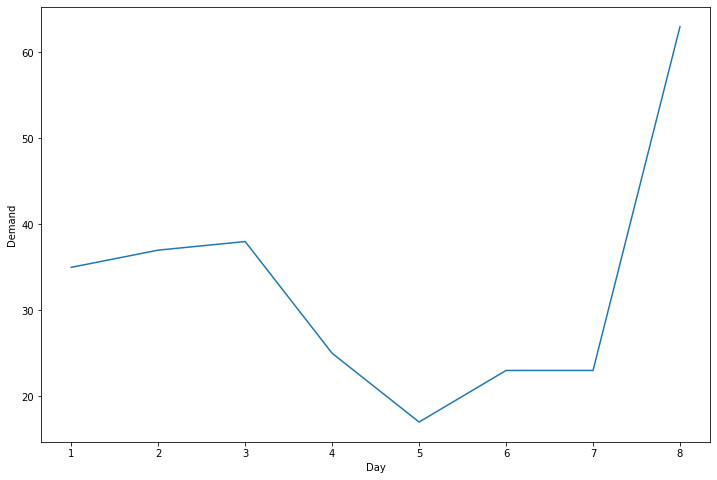

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
plt.xlabel("Day")
plt.ylabel("Demand")
sns.lineplot(px,pdemand)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


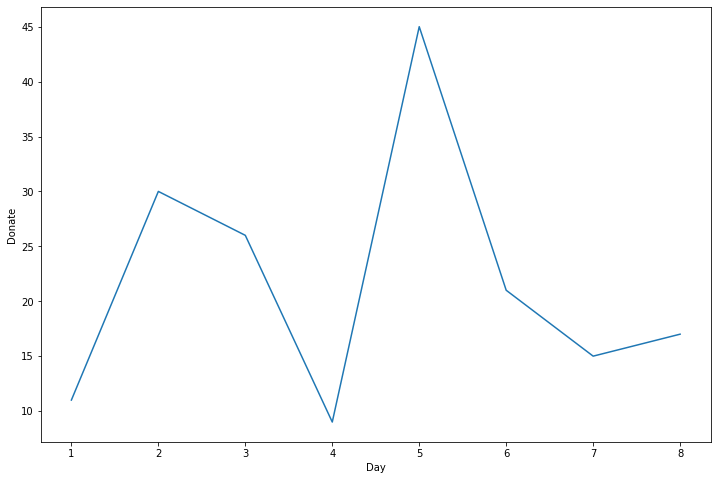

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
plt.xlabel("Day")
plt.ylabel("Donate")
sns.lineplot(px,pdonate)

Process inside blood bank (not import file & print stock)

In [ ]:
Bank_newblood=[]
Bank_Oldblood=[]
i=0
a=0
donate=5
use=1
needmore=0
waste=0
for x in range(donate):
  Bank_newblood.append(0)
for i in Bank_newblood:
  print(i)
n=Bank_newblood.count(7)
if n > 0:
  while 7 in Bank_newblood: Bank_newblood.remove(7)
  for x in range(n):
    Bank_Oldblood.append(7)
n=Bank_Oldblood.count(7)
if n > 0:
  while 35 in Bank_Oldblood: Bank_Oldblood.remove(35)
waste=waste+n
print("///////////")
if use<=len(Bank_newblood)+len(Bank_Oldblood) :
  for x in range(use):
    if  len(Bank_Oldblood)>0:
      Bank_Oldblood.pop()
    else:
      Bank_newblood.pop()
else:
  Bank_newblood.clear()
  Bank_Oldblood.clear()
  needmore = needmore+(use-len(Bank_newblood)-len(Bank_Oldblood))
for i in Bank_newblood:
  print(i)
print("///////////")
while i < len(Bank_newblood):
  Bank_newblood[i]=Bank_newblood[i]+1
  i += 1
while i < len(Bank_Oldblood):
  Bank_Oldblood[i]=Bank_Oldblood[i]+1
  i += 1
for i in Bank_newblood:
  print(i)
print("NewBlood",len(Bank_newblood))
print("OldwBlood",len(Bank_Oldblood))
print("needmore",needmore)
print("waste",waste)




0
0
0
0
0
///////////
0
0
0
0
///////////
1
1
1
1
NewBlood 4
OldwBlood 0
needmore 0
waste 0


In [ ]:
a = [1,1]
use = 10
don = 5
for x in range(don):
  a.append(1)
if use > don and len(a) > 0:
  print("not enough")
  while len(a) > 0: 
    a.pop()
    use =use-1
  print(use)


not enough
3


In [ ]:
sample=[1,2,3,4,7,7,7]
n=sample.count(7)
if n > 0:
  while 7 in sample: sample.remove(7)
print(n)
print("////////")
for x in sample:
  print(x)


3
////////
1
2
3
4


In [ ]:
n =input("Enter Number")